In [12]:
import numpy as np
import matplotlib.pyplot as plt

def construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q):
    potential = alpha * x**2 + q
    potential = np.diag(potential)

    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (mass * dx**2) * finite_diff
    
    hamiltonian = kinetic + potential*np.eye(N)

    return hamiltonian

def time_evolution(hamiltonian, time, mass, h_bar):
    te_operator = np.exp((-1j * hamiltonian * time)/( 2 * mass * h_bar))
    return te_operator

c:\Users\kozy8\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

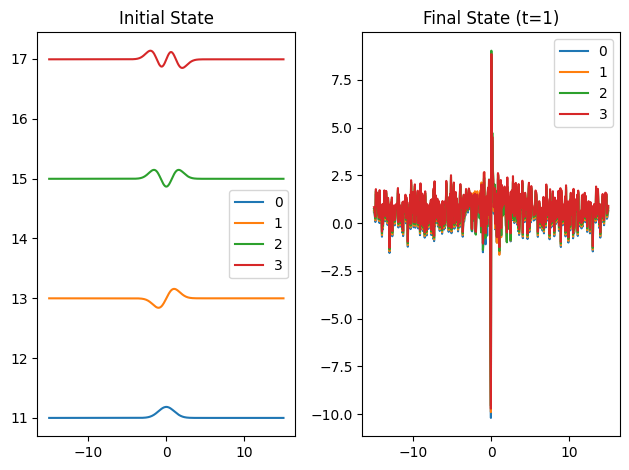

In [ ]:
x_min = -15.0
x_max = 15.0
N = 500

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1
h_bar = 1.0
alpha = 1.0
q = 10

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q)

eigval, eigvec = np.linalg.eigh(hamiltonian)

eigvec = eigvec.T

levels = [0, 1, 2, 3]

plt.subplot(1,2,1)
plt.title("Initial State")
for level in levels:
    plt.plot(x,eigval[level]+eigvec[level]/np.linalg.norm(eigvec[level]))
    plt.legend(['0', '1', '2', '3'])

t = 0
t_max = 1
t_steps = 100
t_values = np.linspace(t, t_max, t_steps)
dt = t_values[1] - t_values[0]
count = 0


while t <= t_max:

    teo = time_evolution(hamiltonian, t, mass, h_bar)
    new_state = np.dot(teo, eigvec)
    
    t += dt
    count += 1


#split real and imaginary components for graphing?
new_state_real = np.real(new_state)
plt.subplot(1,2,2)
plt.title("Final State (t=1)")
for level in levels:
    plt.plot(x,new_state_real[level]+eigval[level]/np.linalg.norm(new_state_real[level]))
    plt.legend(['0', '1', '2', '3'])

plt.tight_layout()
plt.show